In [1]:
#!pip install kagglehub
!pip install mlxtend

In [2]:
import kagglehub
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import os
from mlxtend.frequent_patterns import apriori,association_rules

In [3]:
import streamlit as st

<frozen importlib._bootstrap>:488: DeprecationWarning: Type google.protobuf.pyext._message.ScalarMapContainer uses PyType_Spec with a metaclass that has custom tp_new. This is deprecated and will no longer be allowed in Python 3.14.
<frozen importlib._bootstrap>:488: DeprecationWarning: Type google.protobuf.pyext._message.MessageMapContainer uses PyType_Spec with a metaclass that has custom tp_new. This is deprecated and will no longer be allowed in Python 3.14.


In [4]:
path = kagglehub.dataset_download("aslanahmedov/market-basket-analysis")

print("Path to dataset files:", path)

for filename in os.listdir(path):
    print(filename)

Path to dataset files: C:\Users\rulok\.cache\kagglehub\datasets\aslanahmedov\market-basket-analysis\versions\2
Assignment-1_Data.csv
Assignment-1_Data.xlsx


In [5]:
csv_path = os.path.join(path, "Assignment-1_Data.csv")
df = pd.read_csv(csv_path, sep=';', engine='python')
df.head()


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [7]:
df.shape

(522064, 7)

# Data Cleaning and Preprocessing

Before conducting any analysis, it is essential to clean and preprocess the dataset to ensure accuracy, consistency, and reliability of the results. This step involves handling missing values, correcting formatting issues, and preparing the data for further analysis.

First, the following columns need to be modified to standardize data types and improve interpretability:


1.   Date column – Convert the date strings into a proper datetime format to enable time-based analysis.
2.   Price column – Replace commas with periods to ensure the values are interpreted as numeric (float) rather than string.


In [8]:
df["Date"] = pd.to_datetime(df["Date"], format='%d.%m.%Y %H:%M')

df["Year/Month"] = df["Date"].dt.to_period("M")
df

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year/Month
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,"2,55",17850.0,United Kingdom,2010-12
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,2010-12
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,"2,75",17850.0,United Kingdom,2010-12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,2010-12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,2010-12
...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,"0,85",12680.0,France,2011-12
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,"2,1",12680.0,France,2011-12
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,"4,15",12680.0,France,2011-12
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,"4,15",12680.0,France,2011-12


In [9]:
df["Price"] = df["Price"].str.replace(",",".").astype(float)
df

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year/Month
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12


In [10]:
df.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
Year/Month         0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
 7   Year/Month  522064 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), period[M](1)
memory usage: 31.9+ MB


Next, I will examine the missing values in the Itemname column to understand their impact on the dataset.

In [12]:
df[df["Itemname"].isnull()]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year/Month
613,536414,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,2010-12
1937,536545,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,2010-12
1938,536546,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,2010-12
1939,536547,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,2010-12
1940,536549,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,2010-12
...,...,...,...,...,...,...,...,...
515623,581199,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom,2011-12
515627,581203,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom,2011-12
515633,581209,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom,2011-12
517266,581234,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,2011-12


There are missing values present in the Itemname, Price, and CustomerID columns. Since Itemname and Price are critical for the analysis, any rows missing these values will be removed. For CustomerID, depending on the context, we may consider imputing or retaining those rows. Additionally, the Quantity column contains negative values, which likely indicate erroneous entries that will require further investigation or cleaning.

In [13]:
df[df['Quantity']<0]


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year/Month
2359,536589,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,2010-12
4289,536764,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,2010-12
6998,536996,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,2010-12
6999,536997,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,2010-12
7000,536998,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,2010-12
...,...,...,...,...,...,...,...,...
515634,581210,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom,2011-12
515636,581212,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom,2011-12
515637,581213,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom,2011-12
517209,581226,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom,2011-12


In [14]:
df = df[(df["Quantity"] > 0) & (df["Price"] > 0)]
df

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year/Month
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 519551 entries, 0 to 522063
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      519551 non-null  object        
 1   Itemname    519551 non-null  object        
 2   Quantity    519551 non-null  int64         
 3   Date        519551 non-null  datetime64[ns]
 4   Price       519551 non-null  float64       
 5   CustomerID  387985 non-null  float64       
 6   Country     519551 non-null  object        
 7   Year/Month  519551 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), period[M](1)
memory usage: 35.7+ MB


After filtering, rows with missing values in the "Quantity"and "Price" columns,  "Itemname" rows with **NaN** was removed to ensure data quality for the analysis.





In [16]:
df[df["CustomerID"].isnull()]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year/Month
1410,536544,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010-12
1411,536544,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010-12
1412,536544,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,2010-12
1413,536544,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,2010-12
1414,536544,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,2010-12
...,...,...,...,...,...,...,...,...
521695,581498,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,2011-12
521696,581498,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,2011-12
521697,581498,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,2011-12
521698,581498,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,2011-12


Adding a new column called **Total Price**.

In [17]:
df["TotalSales"] = df["Quantity"] * df["Price"]
df

C:\Users\rulok\AppData\Local\Temp\ipykernel_19340\2086559489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalSales"] = df["Quantity"] * df["Price"]


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year/Month,TotalSales
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
...,...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,10.20
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,12.60
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60


In [18]:
df.to_csv("clean_data.csv", index=False)

# Explore Data Analysis

Next, I performed Exploratory Data Analysis (EDA) to better understand the dataset's structure, distribution, and key patterns.

In [19]:
print(df['Country'].unique())

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium' 'Lithuania'
 'Japan' 'Iceland' 'Sweden' 'Austria' 'Bahrain' 'Israel' 'Greece'
 'Hong Kong' 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Unspecified' 'Brazil' 'USA' 'Malta' 'RSA']


## Total Monthly Sales Over Time

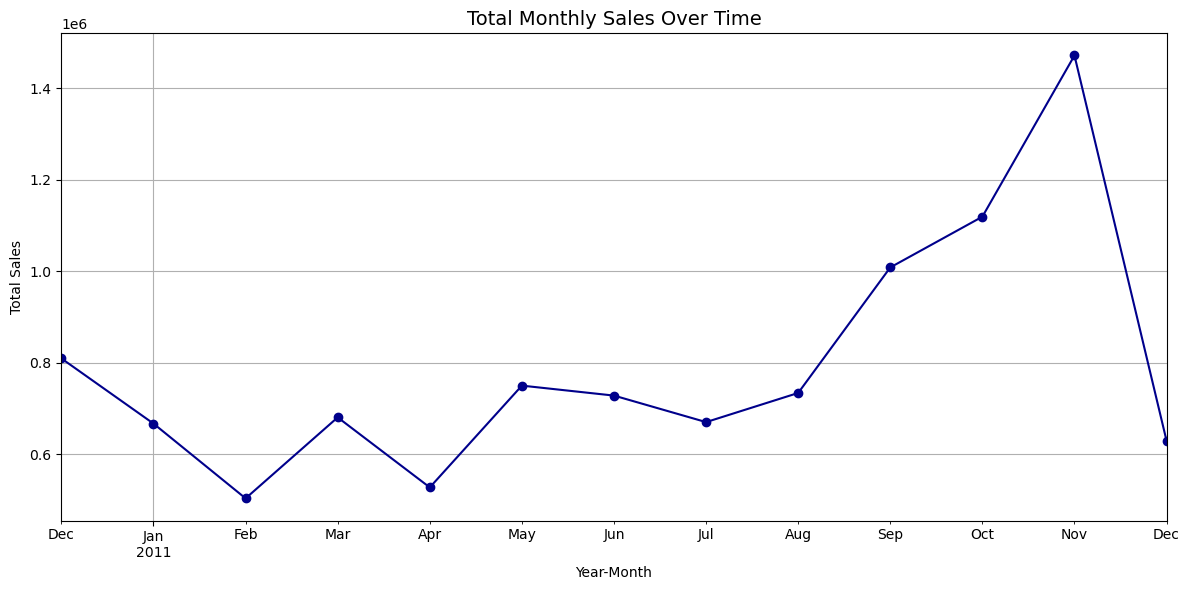

In [20]:
monthly_sales = df.groupby('Year/Month')['TotalSales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='darkblue')
plt.title('Total Monthly Sales Over Time', fontsize=14)
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Top 10 Selling Products (by Quantity)

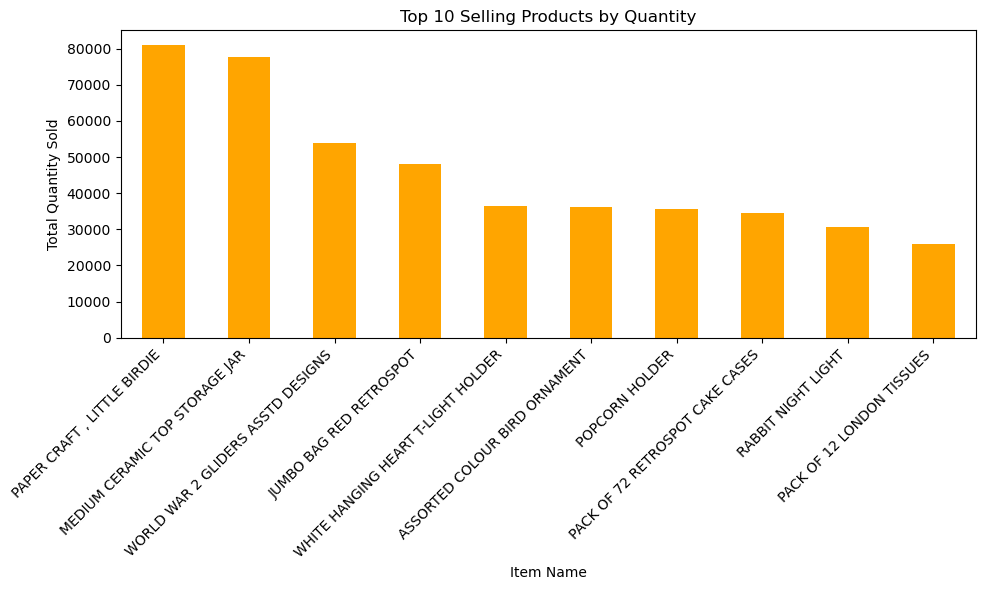

In [21]:
top_products = df.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='Orange')
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Item Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
top_products.to_csv("top_10_items.csv", index=False)

# Top 10 Products by Revenue (Sales)

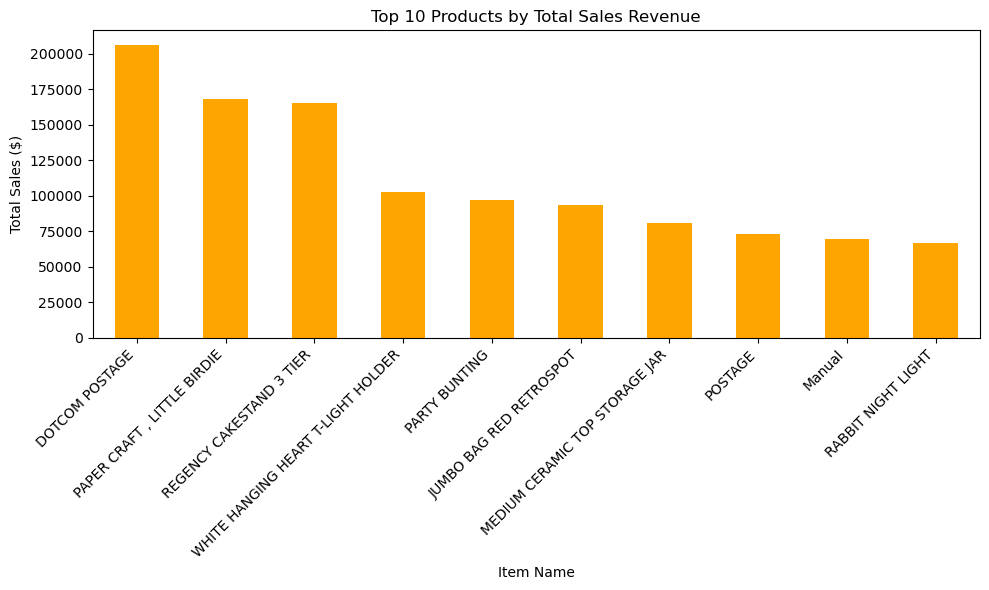

In [23]:
top_revenue_items = df.groupby('Itemname')['TotalSales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_revenue_items.plot(kind='bar', color='orange')
plt.title('Top 10 Products by Total Sales Revenue')
plt.xlabel('Item Name')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
top_revenue_items.to_csv("top_10_revenue_items.csv", index=False)

# Sales by Country

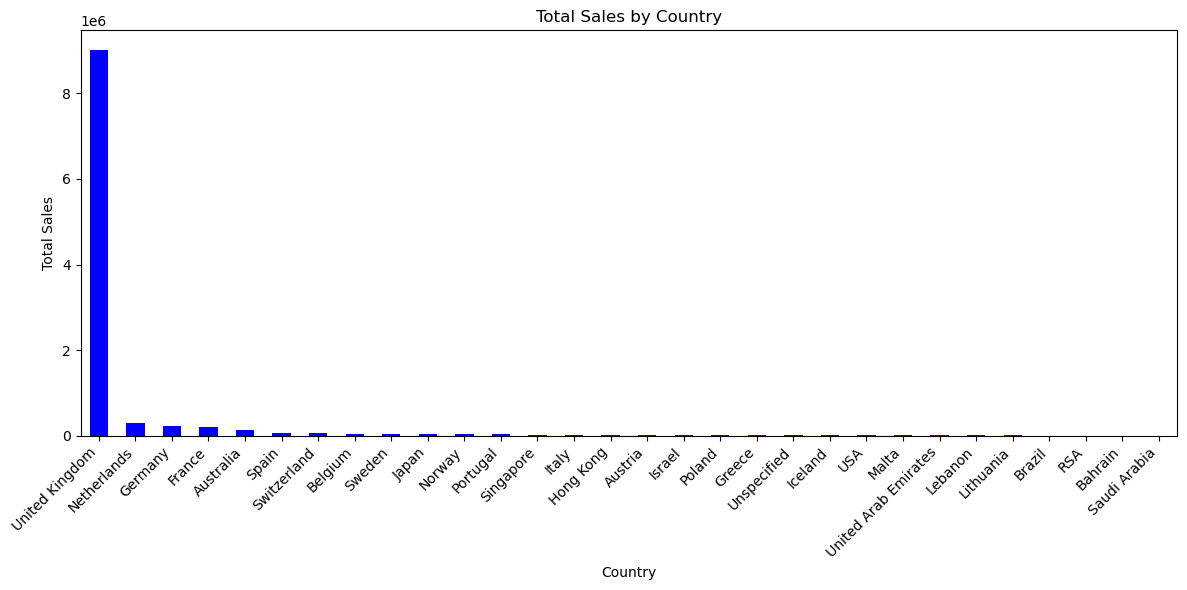

In [25]:
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar', color='blue')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
country_sales

Country
United Kingdom          9025222.084
Netherlands              285446.340
Germany                  228867.140
France                   209715.110
Australia                138521.310
Spain                     61577.110
Switzerland               57089.900
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33747.100
Singapore                 21279.290
Italy                     17483.240
Hong Kong                 15691.800
Austria                   10198.680
Israel                     8135.260
Poland                     7334.650
Greece                     4760.520
Unspecified                4749.790
Iceland                    4310.000
USA                        3580.390
Malta                      2725.590
United Arab Emirates       1902.280
Lebanon                    1693.880
Lithuania                  1661.060
Brazil                     1143.600
RSA                 

In [27]:
country_sales.to_csv("country_sales.csv", index=False)

# Top-Selling Items by Country

In [28]:

country_items = df.groupby(['Country', 'Itemname'])['Quantity'].sum()

top_items_by_country = country_items.groupby(level=0).idxmax()

summary = pd.DataFrame({
    'Top Item': [item[1] for item in top_items_by_country],
    'Country': [item[0] for item in top_items_by_country]})

summary.sort_values('Country').reset_index(drop=True)

,Top Item,Country
0,MINI PAINT SET VINTAGE,Australia
1,SET 12 KIDS COLOUR CHALK STICKS,Austria
2,ICE CREAM SUNDAE LIP GLOSS,Bahrain
3,PACK OF 72 RETROSPOT CAKE CASES,Belgium
4,DOLLY GIRL LUNCH BOX,Brazil
5,RABBIT NIGHT LIGHT,France
6,ROUND SNACK BOXES SET OF4 WOODLAND,Germany
7,4 LAVENDER BOTANICAL DINNER CANDLES,Greece
8,ROUND SNACK BOXES SET OF4 WOODLAND,Hong Kong
9,ICE CREAM SUNDAE LIP GLOSS,Iceland


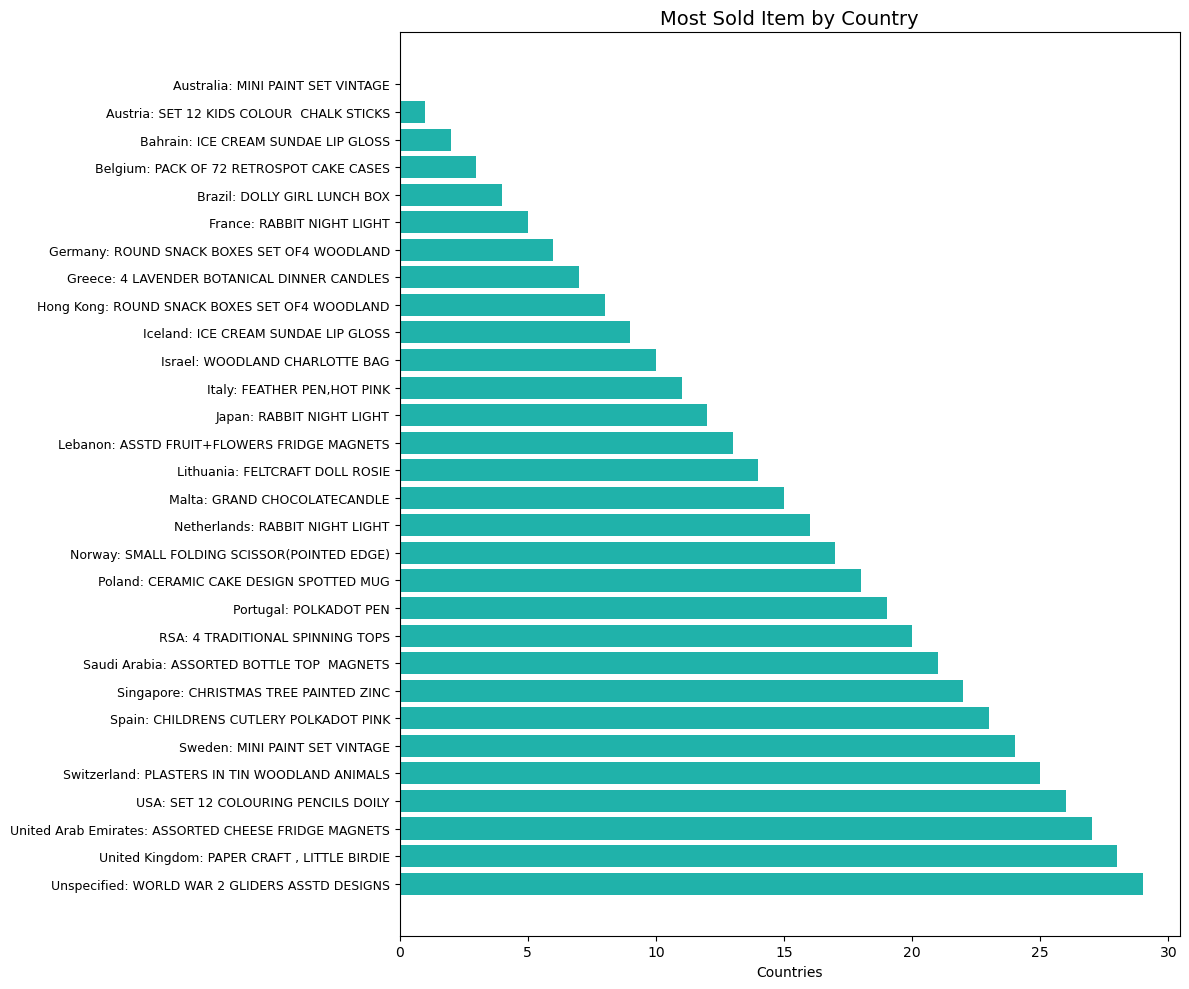

In [29]:
item_counts = summary['Top Item'].value_counts()

summary = summary.sort_values('Country')

# Plot
plt.figure(figsize=(12, 10))
plt.barh(summary['Country'], range(len(summary)), color='lightseagreen')
plt.yticks(ticks=range(len(summary)), labels=summary['Country'] + ": " + summary['Top Item'], fontsize=9)
plt.xlabel("Countries")
plt.title("Most Sold Item by Country", fontsize=14)
plt.gca().invert_yaxis()  # Highest countries at the top
plt.tight_layout()
plt.show()

#  Most Sold Item by Country (with Quantities)

In [30]:
# Step 1: Total quantity sold per country
total_by_country = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Step 2: Select top 15 countries
top_15_countries = total_by_country.head(15).index

# Step 3: Filter only those countries
filtered_df = df[df['Country'].isin(top_15_countries)]

# Step 4: Group by Country and Itemname, summing Quantity
grouped = filtered_df.groupby(['Country', 'Itemname'])['Quantity'].sum()

# Step 5: Get most sold item for each country
idx = grouped.groupby(level=0).idxmax()
quantities = grouped.loc[idx].reset_index()

# Rename columns
quantities.columns = ['Country', 'Top Item', 'Quantity Sold']

# sort by quantity sold
quantities = quantities.sort_values('Quantity Sold', ascending=False)

quantities

,Country,Top Item,Quantity Sold
14,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",80995
7,Netherlands,RABBIT NIGHT LIGHT,4801
3,France,RABBIT NIGHT LIGHT,4024
6,Japan,RABBIT NIGHT LIGHT,3408
0,Australia,MINI PAINT SET VINTAGE,2952
12,Sweden,MINI PAINT SET VINTAGE,2916
4,Germany,ROUND SNACK BOXES SET OF4 WOODLAND,1233
11,Spain,CHILDRENS CUTLERY POLKADOT PINK,729
13,Switzerland,PLASTERS IN TIN WOODLAND ANIMALS,639
8,Norway,SMALL FOLDING SCISSOR(POINTED EDGE),576


In [31]:
quantities.to_csv("most_sold_item_top_15_countries.csv",index=False)

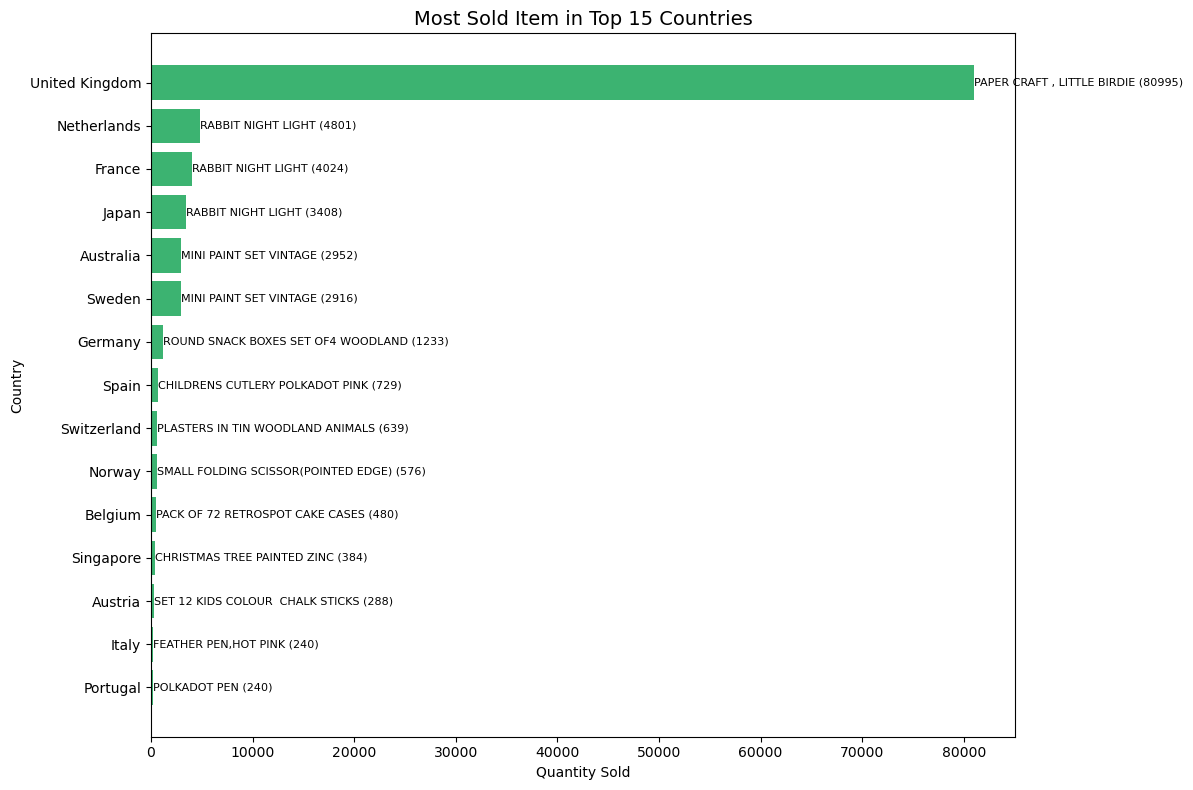

In [32]:
plt.figure(figsize=(12, 8))
plt.barh(quantities['Country'], quantities['Quantity Sold'], color='mediumseagreen')
for i, (item, qty) in enumerate(zip(quantities['Top Item'], quantities['Quantity Sold'])):
    plt.text(qty + 5, i, f"{item} ({qty})", fontsize=8, va='center')

plt.title("Most Sold Item in Top 15 Countries", fontsize=14)
plt.xlabel("Quantity Sold")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#  Market Basket Analysis (Association Rules)

In [33]:
df = df[df['Quantity'] > 0]

# Convert BillNo to string (important for grouping)
df['BillNo'] = df['BillNo'].astype(str)

# Create a basket (transaction-item matrix)
basket = df.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().fillna(0)

# Convert quantities to 1 (presence) or 0 (absence)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

basket.head()

C:\Users\rulok\AppData\Local\Temp\ipykernel_19340\1735015348.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Find frequent itemsets
frequent_items = apriori(basket, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_items, metric="lift", min_threshold=1)

# Sort by confidence
rules = rules.sort_values(by='confidence', ascending=False)

rules.head()

C:\Users\rulok\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
166,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.029091,0.049747,0.026279,0.903339,18.158696,1.0,0.024832,9.830800,0.973243,0.500000,0.898279,0.715801
165,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.030881,0.051741,0.026279,0.850993,16.447213,1.0,0.024682,6.363872,0.969127,0.466425,0.842863,0.679449
29,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037579,0.049747,0.030881,0.821769,16.518987,1.0,0.029012,5.331573,0.976146,0.547101,0.812438,0.721265
172,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",(JUMBO BAG RED RETROSPOT),0.026279,0.105373,0.021064,0.801556,7.606813,1.0,0.018295,4.508216,0.891980,0.190476,0.778183,0.500730
147,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.037579,0.051741,0.029091,0.774150,14.962049,1.0,0.027147,4.198617,0.969600,0.483022,0.761826,0.668201


In [35]:
# Filter rules with high confidence and lift
strong_rules = rules[(rules['confidence'] >= 0.4) & (rules['lift'] >= 3)]

strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
166,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.026279,0.903339,18.158696
165,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.026279,0.850993,16.447213
29,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030881,0.821769,16.518987
172,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",(JUMBO BAG RED RETROSPOT),0.021064,0.801556,7.606813
147,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.029091,0.774150,14.962049
...,...,...,...,...,...
102,(LUNCH BAG BLACK SKULL.),(LUNCH BAG SUKI DESIGN),0.026177,0.406349,7.379558
36,(JAM MAKING SET PRINTED),(JAM MAKING SET WITH JARS),0.023110,0.405018,7.281016
100,(LUNCH BAG BLACK SKULL.),(LUNCH BAG SPACEBOY DESIGN),0.025922,0.402381,6.861525
93,(LUNCH BAG APPLE DESIGN),(LUNCH BAG BLACK SKULL.),0.021013,0.402153,6.242622


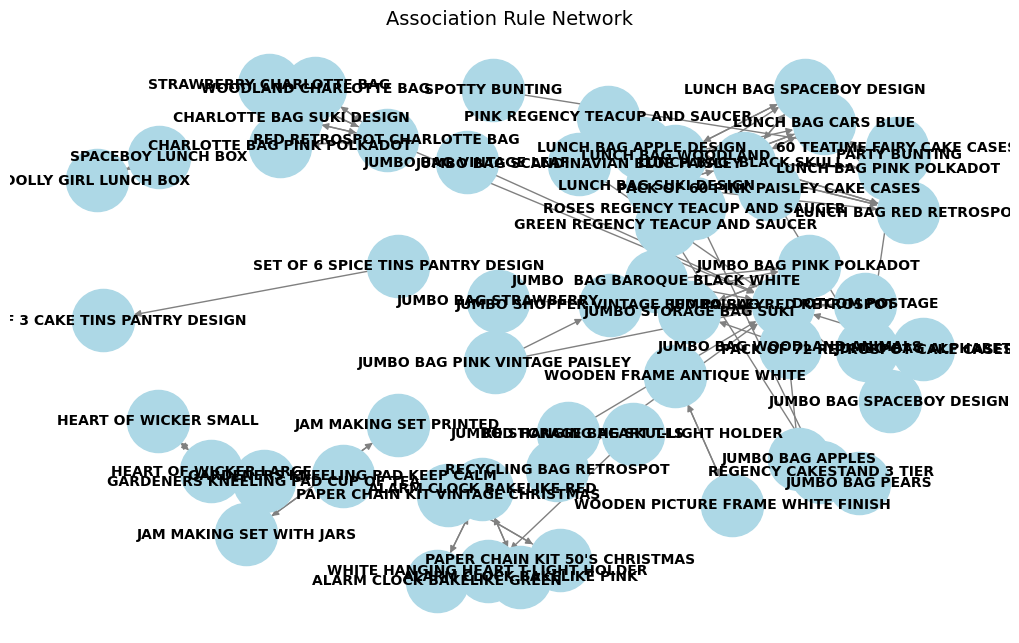

In [36]:
G = nx.DiGraph()

for _, row in strong_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold', edge_color='gray')
plt.title('Association Rule Network', fontsize=14)
plt.show()

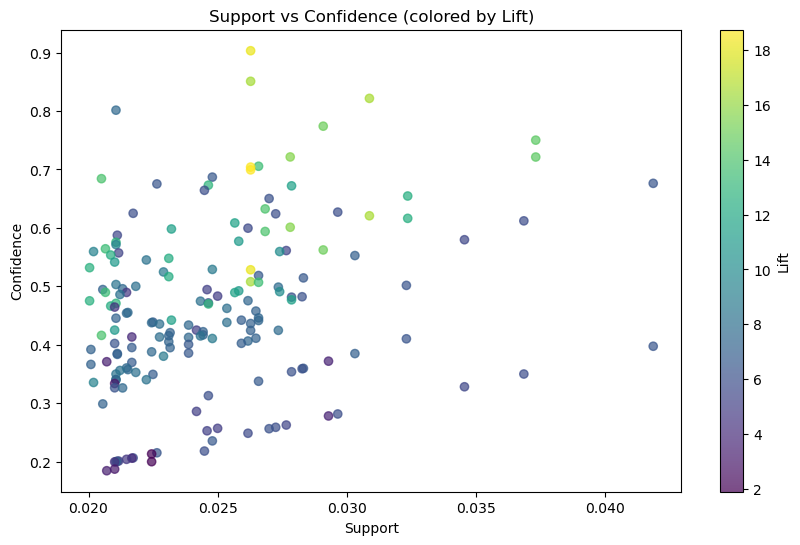

In [37]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence (colored by Lift)')
plt.show()